# Accessing postgres DB

In [ ]:
import pandas as pd
from sqlalchemy import create_engine
from config.py import pw

In [143]:
# https://docs.sqlalchemy.org/en/13/dialects/postgresql.html#module-sqlalchemy.dialects.postgresql.psycopg2

user = "postgres"
password = pw
host = "localhost"
port = "5432"
db = "UT_Data_SQL_HW"
uri = f"postgresql://{user}:{password}@{host}:{port}/{db}"

In [144]:
engine = create_engine(uri)
salary_data = "SELECT * FROM salaries"
title_data = "SELECT * FROM titles"

In [91]:
df_salaries = pd.DataFrame(pd.read_sql(salary_data, con=engine))
df_titles = pd.DataFrame(pd.read_sql(title_data, con=engine))

In [175]:
merged = pd.merge(df_salaries, df_titles, on='emp_no', how='left')

# Salary bins

In [161]:
# Create bins based on salary categories
bins = [39999, 59999, 79999, 99999, 119999, 139999]

# Create labels to display that correspond with ages
salaries = ['40000-59000','60000-79999', '80000-999999', '100000-119999', '120000<']

# Create new DF and use .cut() to seperate data into bins
salary_bins = pd.DataFrame(pd.cut(df_salaries['salary'], bins=bins, labels=salaries).value_counts())

salary_bins = salary_bins.reindex(salaries)

# salary_bins = salary_bins.reset_index()

# Display all rows
salary_bins

,salary
40000-59000,216380
60000-79999,66227
80000-999999,16129
100000-119999,1264
120000<,24


# Salary "Histogram"

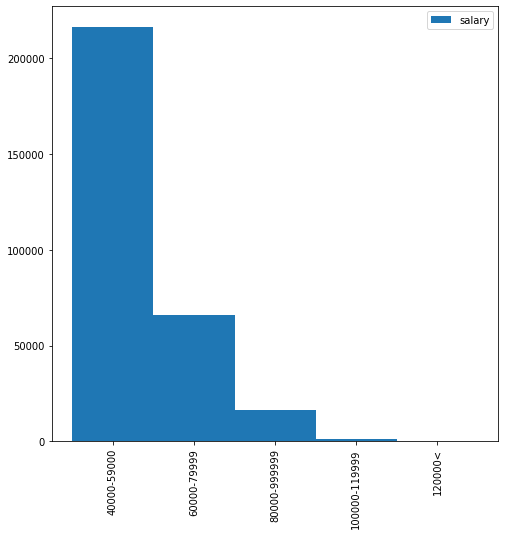

In [174]:
import matplotlib.pyplot as plt
import numpy as np


salary_bins.plot.bar(width=1.0,figsize=(8,8))



# Real histogram

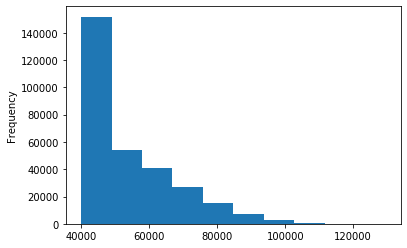

In [177]:
df_salaries['salary'].plot.hist()

# Salary by Title

In [99]:
avg_salary = merged.groupby('title')['salary'].mean()
avg_salary

title
Assistant Engineer    48493.204786
Engineer              48539.781423
Manager               51531.041667
Senior Engineer       48506.751806
Senior Staff          58503.286614
Staff                 58465.271904
Technique Leader      48580.505772
Name: salary, dtype: float64

Text(0, 0.5, 'Salary ($)')

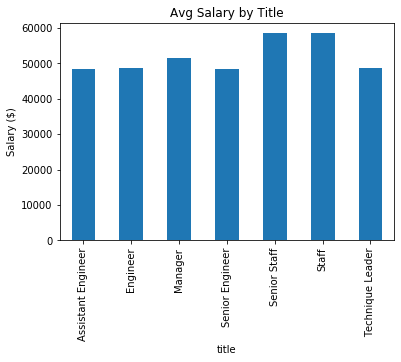

In [102]:
avg_salary.plot(kind='bar',title='Avg Salary by Title')
plt.ylabel('Salary ($)')